In [ ]:
from google.colab import files

files.upload()
! mkdir ~/.kaggle
! mv kaggle.json ~/.kaggle/
! mkdir ./images

Saving kaggle.json to kaggle.json


In [ ]:
! kaggle datasets download grassknoted/asl-alphabet
! unzip asl-alphabet.zip -d ./images/
! rm asl-alphabet.zip

In [ ]:
from keras import layers
from keras.models import Sequential
from keras.losses import SparseCategoricalCrossentropy
from keras.preprocessing import image_dataset_from_directory
from keras.optimizers import Adam
from keras.optimizers.schedules import ExponentialDecay

def load_data():
    train = image_dataset_from_directory("./images/asl_alphabet_train/asl_alphabet_train",
                                        labels="inferred", color_mode="grayscale",
                                        image_size=(80, 80), validation_split=.2,
                                        subset="training", seed=1234321)
    valid = image_dataset_from_directory("./images/asl_alphabet_train/asl_alphabet_train",
                                        labels="inferred", color_mode="grayscale",
                                        image_size=(80, 80), validation_split=.2,
                                        subset="validation", seed=1234321)
    return train, valid

In [ ]:
from typing import List

def get_model(size_list: List[List[int]]) -> List[Sequential]:
    res = []
    for sizes in size_list:
        model = Sequential()
        model.add(layers.Input((80, 80, 1)))
        model.add(layers.Flatten())
        model.add(layers.experimental.preprocessing.Rescaling(1./255))
        for size in sizes:
            model.add(layers.Dropout(.5))
            model.add(layers.Dense(size, activation="relu")) 
        model.add(layers.Dense(29, activation="softmax"))
        decay = ExponentialDecay(5e-5, decay_steps=15000,
                                 decay_rate=.9)
        model.compile(optimizer=Adam(learning_rate=decay), 
                      loss=SparseCategoricalCrossentropy(),
                                 metrics=["accuracy"])
        res.append(model)

    return res

#35
def generate_models():
    sizes = [
             [3200],
             [3200, 1600],
             [3200, 1600, 800]
             ]
    return get_model(sizes)

In [ ]:
import time
metrics = []
models = generate_models()
for model in models:
    print(model.summary())
start = time.time()
for model in models:
    train, valid = load_data()
    hist = model.fit(train, epochs=125, validation_data=valid)
    train = model.evaluate(train)
    valid = model.evaluate(valid)
    metrics.append((hist, train, valid))
print("Finished in", (time.time() - start) / 3600, "hours")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
rescaling (Rescaling)        (None, 6400)              0         
_________________________________________________________________
dropout (Dropout)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 3200)              20483200  
_________________________________________________________________
dense_1 (Dense)              (None, 29)                92829     
Total params: 20,576,029
Trainable params: 20,576,029
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_1"
_________________________________________________________________
Layer (type)     

In [ ]:
for i, model in enumerate(models):
    model.save("model" + str(i))

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model0/assets
INFO:tensorflow:Assets written to: model1/assets
INFO:tensorflow:Assets written to: model2/assets


In [ ]:
import pandas as pd
df = pd.DataFrame(columns=["train_accuracy", "val_accuracy", "history"])
for i, info in enumerate(metrics):
    temp = {"train_accuracy": info[1][1], "val_accuracy": info[2][1],
            "history": info[0].history}
    df = df.append(temp, ignore_index=True)

display(df)
df.to_csv('./results.csv')

,train_accuracy,val_accuracy,history
0,0.955230,0.944655,"{'loss': [2.8619892597198486, 2.33767724037170..."
1,0.957012,0.950977,"{'loss': [3.0826213359832764, 2.52668380737304..."
2,0.941422,0.934023,"{'loss': [3.290759801864624, 2.831873416900634..."


In [ ]:
! rm -rf finished_models
! rm finished_models.zip
! mkdir finished_models
! cp -r model* finished_models/
! cp results.csv finished_models/
! zip -r finished_models.zip finished_models 

rm: cannot remove 'finished_models.zip': No such file or directory
  adding: finished_models/ (stored 0%)
  adding: finished_models/model0/ (stored 0%)
  adding: finished_models/model0/variables/ (stored 0%)
  adding: finished_models/model0/variables/variables.data-00000-of-00001 (deflated 29%)
  adding: finished_models/model0/variables/variables.index (deflated 59%)
  adding: finished_models/model0/saved_model.pb (deflated 87%)
  adding: finished_models/model0/assets/ (stored 0%)
  adding: finished_models/model1/ (stored 0%)
  adding: finished_models/model1/variables/ (stored 0%)
  adding: finished_models/model1/variables/variables.data-00000-of-00001 (deflated 39%)
  adding: finished_models/model1/variables/variables.index (deflated 62%)
  adding: finished_models/model1/saved_model.pb (deflated 89%)
  adding: finished_models/model1/assets/ (stored 0%)
  adding: finished_models/model2/ (stored 0%)
  adding: finished_models/model2/variables/ (stored 0%)
  adding: finished_models/model2

In [ ]:
! mv finished_models.zip ./drive/MyDrive/"Colab Notebooks"/

In [ ]:
import os
from keras.models import load_model

! cp ./drive/MyDrive/"Colab Notebooks"/finished_models_strict.zip finished_models.zip
! unzip finished_models.zip

In [ ]:

for i, model in enumerate(models):
    print(f"Model {i}")
    train, valid = load_data()
    data = image_dataset_from_directory("./images/asl_alphabet_train/asl_alphabet_train",
                                        labels="inferred", color_mode="grayscale",
                                        image_size=(80, 80))
    print(model.evaluate(data))
    print(model.evaluate(train))
    print(model.evaluate(valid))

Model 0
Found 87000 files belonging to 29 classes.
Using 69600 files for training.
Found 87000 files belonging to 29 classes.
Using 17400 files for validation.
Found 87000 files belonging to 29 classes.
2719/2719 [==============================] - 185s 68ms/step - loss: 0.2066 - accuracy: 0.9531
[0.2066444456577301, 0.953114926815033]
2175/2175 [==============================] - 147s 68ms/step - loss: 0.2014 - accuracy: 0.9552
[0.2014412134885788, 0.9552298784255981]
544/544 [==============================] - 37s 68ms/step - loss: 0.2275 - accuracy: 0.9447
[0.22745728492736816, 0.944655179977417]
Model 0
Found 87000 files belonging to 29 classes.
Using 69600 files for training.
Found 87000 files belonging to 29 classes.
Using 17400 files for validation.
Found 87000 files belonging to 29 classes.
2719/2719 [==============================] - 185s 68ms/step - loss: 0.1984 - accuracy: 0.9558
[0.1983521729707718, 0.9558045864105225]
2175/2175 [==============================] - 147s 68ms/ste

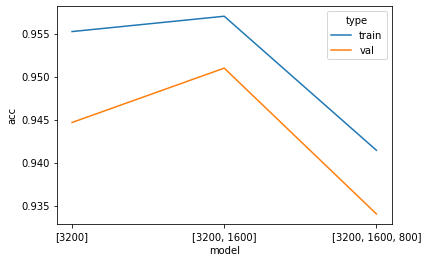

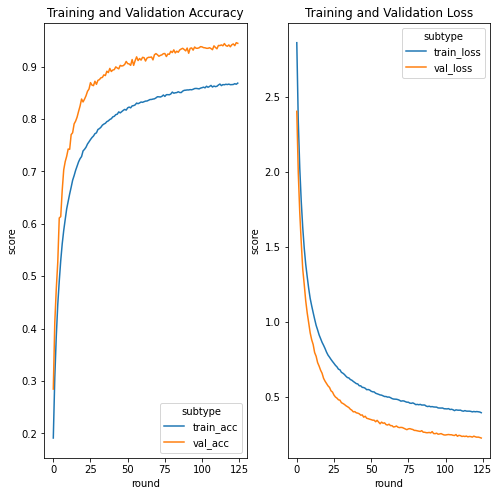

Found 87000 files belonging to 29 classes.
Using 69600 files for training.
Found 87000 files belonging to 29 classes.
Using 17400 files for validation.


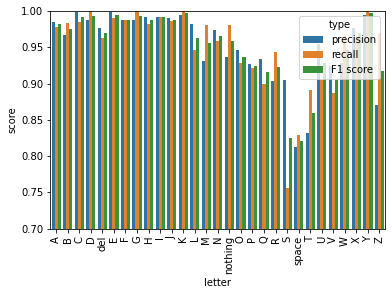

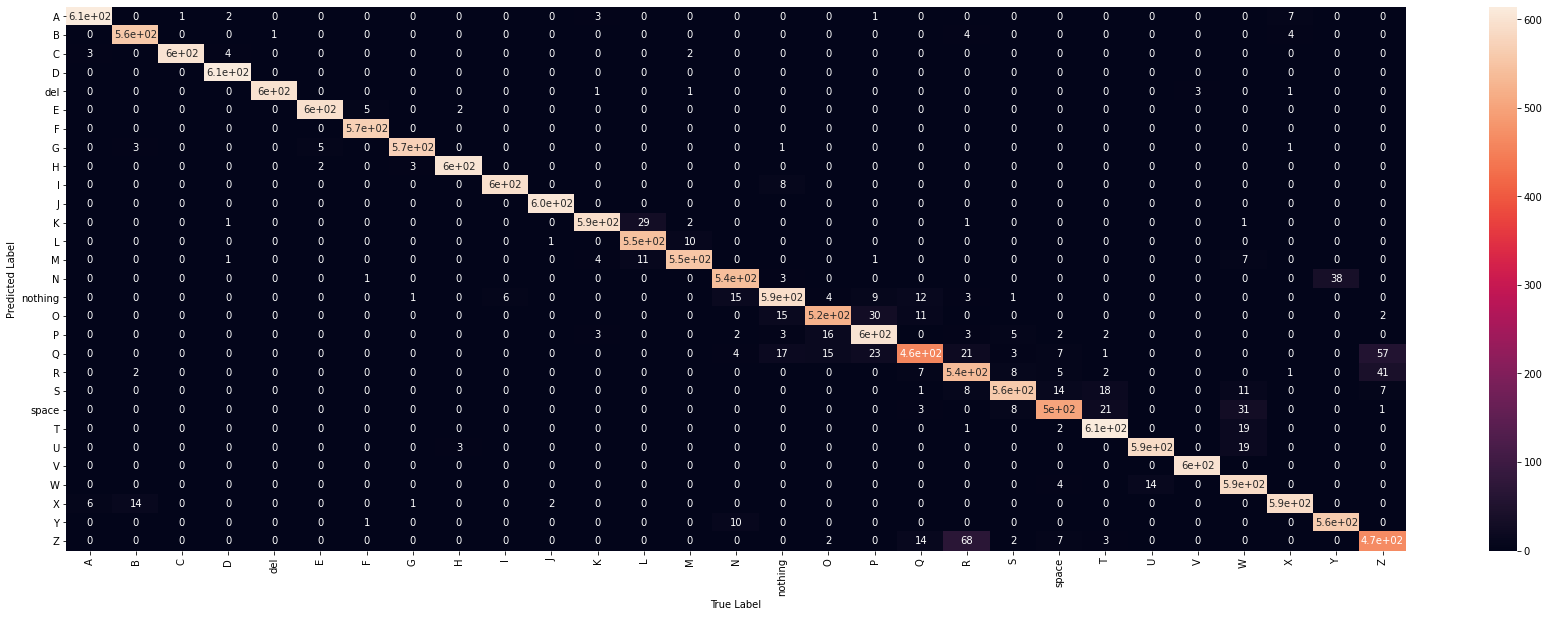

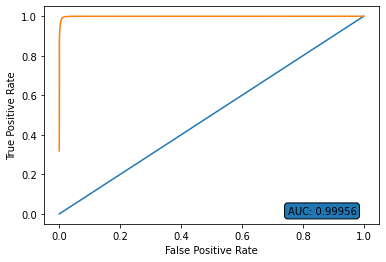

In [ ]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
from keras.models import load_model
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from tensorflow.nn import softmax
from sklearn.preprocessing import label_binarize

letters = [chr(i) for i in range(ord("A"), ord("Z") + 1)]
letters.insert(4, "del")
letters.insert(15, "nothing")
letters.insert(21, "space")

letter_map = {i: letter for i, letter in enumerate(letters)}

def generate_accuracy_graph(res, hist):
    sns.lineplot(data=res, x="model", y="acc", hue="type")
    plt.show()
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    sns.lineplot(data=hist[(hist["model"] == 0) & (hist["type"] == "acc")],
                 x="round", y="score", hue="subtype")
    plt.title("Training and Validation Accuracy")
    plt.subplot(1, 2, 2)
    sns.lineplot(data=hist[(hist["model"] == 0) & (hist["type"] == "loss")],
                 x="round", y="score", hue="subtype")
    plt.title("Training and Validation Loss")
    plt.show()

def graph_report(report, conf_matrix, rates, auc):
    data = pd.DataFrame(columns=["letter", "score", "type"])
    for letter in letters:
        precision = report[letter]["precision"]
        recall = report[letter]["recall"]
        f1 = report[letter]["f1-score"]
        data = data.append({"letter": letter,
                            "score": precision,
                            "type": "precision"}, ignore_index=True)
        data = data.append({"letter": letter,
                            "score": recall,
                            "type": "recall"}, ignore_index=True)
        data = data.append({"letter": letter,
                            "score": f1,
                            "type": "F1 score"}, ignore_index=True)
    sns.barplot(data=data, x="letter", y="score", hue="type")
    plt.xticks(rotation=90)
    plt.ylim(.7, 1)
    plt.show()
    plt.figure(figsize=(30, 10))
    sns.heatmap(conf_matrix, annot=True, square=False,
                xticklabels=letter_map.values(), yticklabels=letter_map.values())
    plt.xticks(rotation=90)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    plt.show()
    sns.lineplot(x=[0, 1], y=[0, 1])
    ax = sns.lineplot(x=rates[0], y=rates[1])
    ax.text(.75, 0, "AUC: {:.5f}".format(auc), bbox={"boxstyle": "round"})
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

def score(model, test_data):
    target = None
    preds = None
    class_probs = None
    for image_batch, label_batch in test_data.as_numpy_iterator():
        if target is None:
            target = label_batch
        else:
            target = np.append(target, label_batch)
        predictions = model.predict(image_batch)
        classes = []
        scores = []
        ins_class_probs = []
        for i, p in enumerate(predictions):
            score = softmax(p)
            classes.append(np.argmax(score))
            scores.append(score[label_batch[i]])
            ins_class_probs.append(score.numpy())
        if preds is None:
            preds = np.array(classes)
            class_probs = np.array(ins_class_probs)
        else:
            preds = np.append(preds, np.array(classes))
            class_probs = np.append(class_probs, np.array(ins_class_probs))

    pred = pd.Series(preds).replace(letter_map)
    target = pd.Series(target).replace(letter_map)
    report = classification_report(target, pred, output_dict=True)
    bin_targets = label_binarize(target, classes=list(letter_map.values()))
    auc_score = roc_auc_score(bin_targets, class_probs.reshape((-1, 29)), average="micro")
    conf_matrix = confusion_matrix(target, pred)
    fpr, tpr, _ = roc_curve(bin_targets.ravel(), class_probs)
    return report, conf_matrix, (fpr, tpr), auc_score

def generate_visuals():
    res = pd.read_csv("finished_models/results.csv")
    history = pd.DataFrame(columns=["model", 'type', "subtype", 'score', 'round'])
    for i, hist in enumerate(res["history"]):
        data = json.loads(hist.replace("'", '"'))
        for j in range(len(data['loss'])):
            history = history.append({"model": i, 'type': 'loss', "subtype": "train_loss",
                                      'score': data['loss'][j],
                                      "round": j},
                                     ignore_index=True)
            history = history.append({"model": i, 'type': 'acc', "subtype": "train_acc",
                                      'score': data['accuracy'][j],
                                      "round": j},
                                     ignore_index=True)
            history = history.append({"model": i, 'type': "loss", "subtype": 'val_loss', 'score': data['val_loss'][j],
                                      "round": j},
                                     ignore_index=True)
            history = history.append({"model": i, 'type': "acc", "subtype": 'val_acc', 'score': data['val_accuracy'][j],
                                      "round": j},
                                     ignore_index=True)
    final_hist = pd.DataFrame(columns=["acc", "type"])
    for item in res.iterrows():
        final_hist = final_hist.append({"acc": item[1]["train_accuracy"],
                                        "type": "train"}, ignore_index=True)
        final_hist = final_hist.append({"acc": item[1]["val_accuracy"],
                                        "type": "val"}, ignore_index=True)
    final_hist["model"] = ["[3200]", "[3200]", "[3200, 1600]",
                       "[3200, 1600]", "[3200, 1600, 800]",
                       "[3200, 1600, 800]"]

    generate_accuracy_graph(final_hist, history)
    model = load_model("./finished_models/model1")
    report, conf_matrix, rates, auc = score(model, load_data()[1])
    graph_report(report, conf_matrix, rates, auc)

generate_visuals()